## import libraries and shit

In [16]:
import math
import pandas as pd
import numpy as np

## Haversine distance fucktion

In [14]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the Earth
    
    Parameters:
        lat1, lon1: latitude and longitude of point i in decimal degrees
        lat2, lon2: latitude and longitude of point j in decimal degrees
        
    Returns:
        distance in miles
    """

    R = 3958.8  # Earth's radius in miles

    # convert latitude and longitude into radians
    rlat1 = math.radians(lat1)
    rlon1 = math.radians(lon1)
    rlat2 = math.radians(lat2)
    rlon2 = math.radians(lon2)

    # get differences between those bitches
    dlat = rlat2 - rlat1
    dlon = rlon2 - rlon1

    # Haversine shit
    Haversine = 2 * R * math.asin(math.sqrt(math.sin(dlat / 2)**2 + math.cos(rlat1) * math.cos(rlat2) * math.sin(dlon / 2)**2))

    return Haversine # distance in miles


## Create the transportation cost matrix for all $i$ and $j$ ($t_{ij}$)

In [22]:
cpm = 0.47 # cost per mile

warehouse_file = pd.read_csv('Warehouses.csv')
warehouse_coords = [[float(i.split(", ")[0]),float(i.split(", ")[1])] for i in warehouse_file["x,y"]]

demand_file = pd.read_csv('Demand.csv')
demand_coords = [[float(i.split(", ")[0]),float(i.split(", ")[1])] for i in demand_file["x,y"]]
demand_coords

# create the transportation costs matrix
t = np.zeros((len(warehouse_coords), len(demand_coords)))
for i, wa in enumerate(warehouse_coords):
    for j, dem in enumerate(demand_coords):
        t[i][j] = haversine_distance(wa[0], wa[1], dem[0], dem[1]) * cpm

t_df = pd.DataFrame(t)
# t_df.loc[-1] = demand_file["Neighborhood"]  # adding a row
# t_df.index = t_df.index + 1  # shifting index
# t_df = t_df.sort_index() 

t_df.to_csv("Transportation_costs.csv")



## Make M versus optimal cost plot

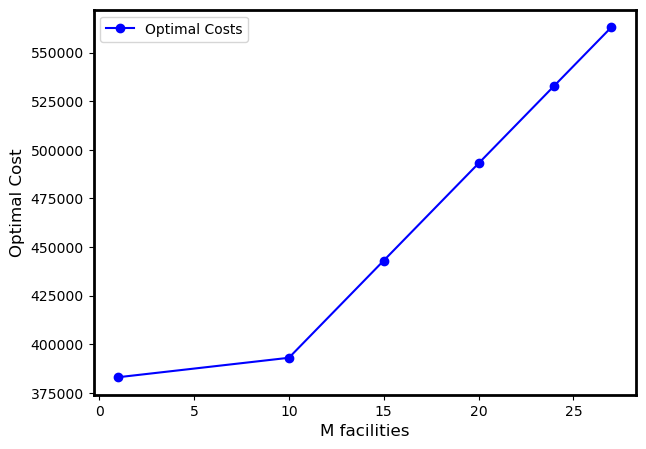

In [27]:
M = [1,10,15,20,24,27]
optimal_costs = [383034.9090967625, 393034.9090967625, 
                 443034.9090967625, 493034.9090967625, 533034.9090967625, 563034.9090967625]

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(7, 5))  # Optional: Adjust figure size
plt.plot(M, optimal_costs, marker='o', linestyle='-', color='b', label='Optimal Costs')

# Set plot labels and title
plt.xlabel('M facilities', fontsize=12)
plt.ylabel('Optimal Cost', fontsize=12)
# plt.title('Optimal Cost vs. Maximum Facilities', fontsize=14)

# Add a legend
plt.legend()

# Make axes borders thicker
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Save the figure to a file
plt.savefig('optimal_costs_vs_m.png', dpi=600)  # Save with high resolution

# Show the plot
plt.show()
